<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_K-Means_Clustering/blob/main/DataScience_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

# **Import Libraries**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [29]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
X = df.iloc[:,[3,4]].values

# **Using Elbow Method to Find Optimal Number of Cluster**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
centroid = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  centroid.append(kmeans.cluster_centers_)

In [32]:
print(wcss)
print(centroid)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]
[array([[60.56, 50.2 ]]), array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]]), array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]]), array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [48.26      , 56.48      ]]), array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]]), array([[ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [ 25.72727273,  79.36363636],
       [109.7       ,  82.        ],
       [ 26.30434783,  20.91304348],
       [ 78.55172414,  82.17241379]]), array([[ 26.30434783,  20.91304348],
       [ 54.61538462,  50.0

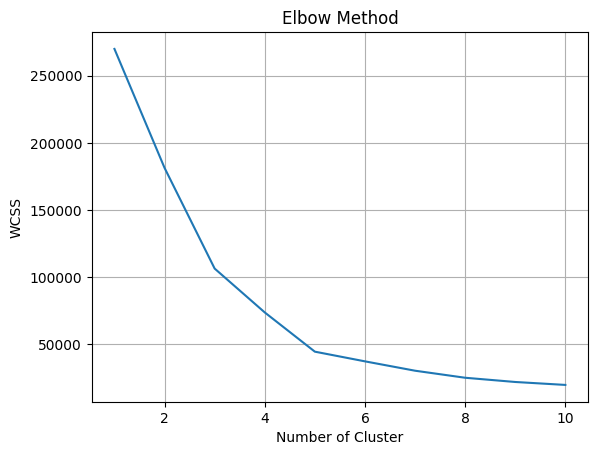

In [33]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# **Training K-Means Based on Optimal Cluster**

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [35]:
predict = kmeans.predict(X)
print(predict)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# **Visualising KMeans Cluster**

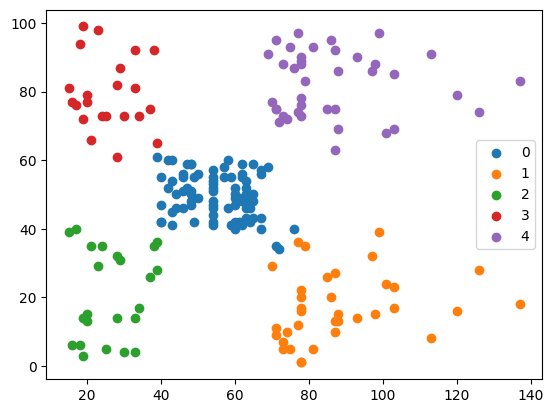

In [47]:
for i in range(len(np.unique(predict))):
  plt.scatter(X[predict == i, 0], X[predict == i, 1])
  plt.legend(np.unique(predict))